In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from copy import copy
from tqdm import tqdm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

from sklearn.utils.validation import check_X_y, check_is_fitted, check_array
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, RegressorMixin
from runc import *
from ensembles import GradientBoostingMSE
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from scipy.optimize import minimize
import numpy.ma as mask
from sklearn.dummy import DummyRegressor
from models import BoostingElementaryPredicates, BoostingElementaryPredicates1

## Baseline

In [7]:
# Генерация случайных данных для регрессии
X, y = make_regression(n_samples=100, n_features=10, n_informative=5, random_state=42)

# Инициализация класса KBinsDiscretizer
# encoder = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Применение KBinsDiscretizer к данным X
# X_encoded = encoder.fit_transform(X)

# X_encoded = X_encoded.astype('int64')

# Разделение данных на обучающий и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

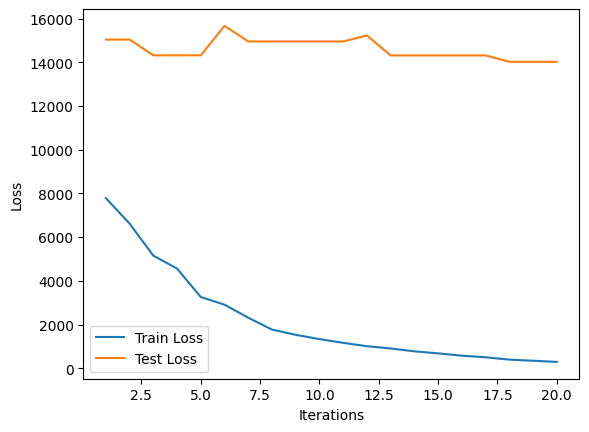

BoostingElementaryPredicates1(m=50, num_iter=20)

In [4]:
model = BoostingElementaryPredicates1(num_iter=20, m=50)
model.fit_predict(X_train, y_train, X_test, y_test)
# ядро крашится на матрицах размера >= 60

In [ ]:
model = BoostingElementaryPredicates1(num_iter=20, m=60)
model.fit_predict(X_train, y_train, X_test, y_test)
# ядро крашится на матрицах размера >= 60

: 

: 

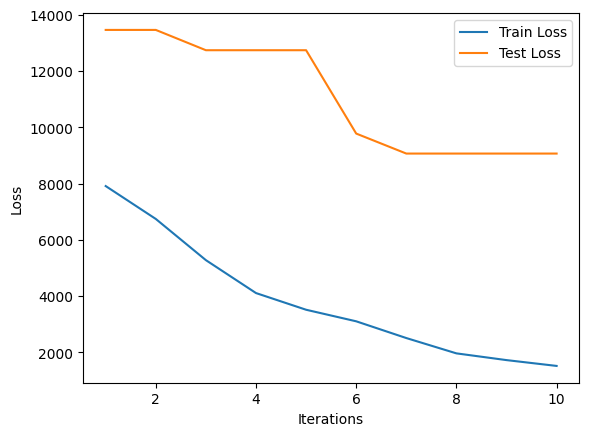

BoostingElementaryPredicates1(m=27, num_iter=10)

In [12]:
model = BoostingElementaryPredicates1(10, 27)
model.fit_predict(X_train, y_train, X_test, y_test)
# y_pred = model.predict(X_test)

In [ ]:
# Генерация случайных данных для регрессии
X, y = make_regression(n_samples=100, n_features=20, n_informative=10, random_state=42)

# Инициализация класса KBinsDiscretizer
encoder = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Применение KBinsDiscretizer к данным X
X_encoded = encoder.fit_transform(X)

X_encoded = X_encoded.astype('int64')

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [11]:
param_grid = {
    "num_iter" : np.linspace(10, 50, 10).astype(int),
    "m" : np.linspace(5, 50, 15).astype(int)
}

model_to_tune = BoostingElementaryPredicates(num_iter=10, m=5)

grid_search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid, scoring=rmse_scorer, cv=3, n_jobs=-1)
# grid_search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid, scoring=r2_score, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение RMSE:", np.abs(grid_search.best_score_))

Лучшие параметры: {'m': 27, 'num_iter': 10}
Лучшее значение RMSE: 259.8331613264076


In [ ]:
# Создание и обучение модели BoostingRegressor
# model = GradientBoostingRegressor()
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model = BoostingElementaryPredicates(54, 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2)

model = GradientBoostingRegressor()
model.fit(X, y)
y_pred = model.predict(X_test)
# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2)

# Сравнение с простой моделью Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("R2_score (Linear Regression):", r2_linear)

Mean Squared Error: 25054.37421851829
R2_score: -489.87162857789394
Mean Squared Error: 2.1410622972746998
R2_score: 0.9580517666263183
Mean Squared Error (Linear Regression): 10.710864418838367
R2_score (Linear Regression): 0.7901500386760351


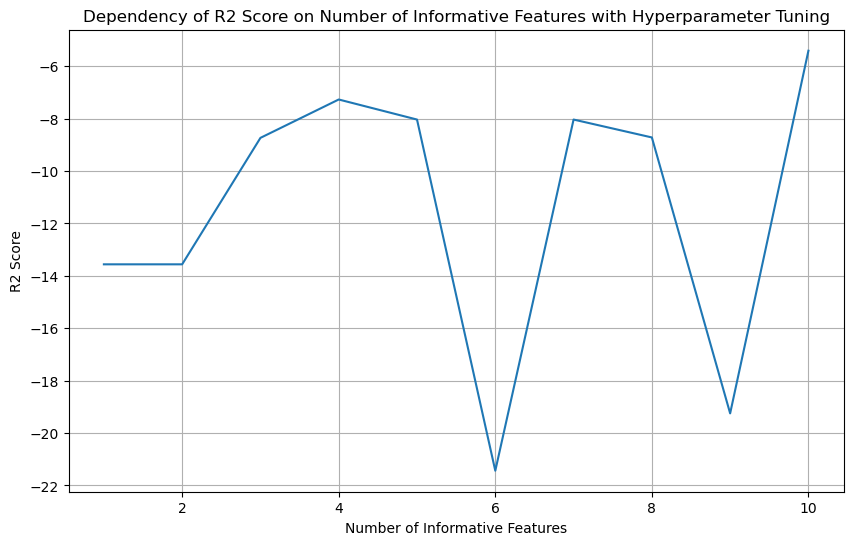

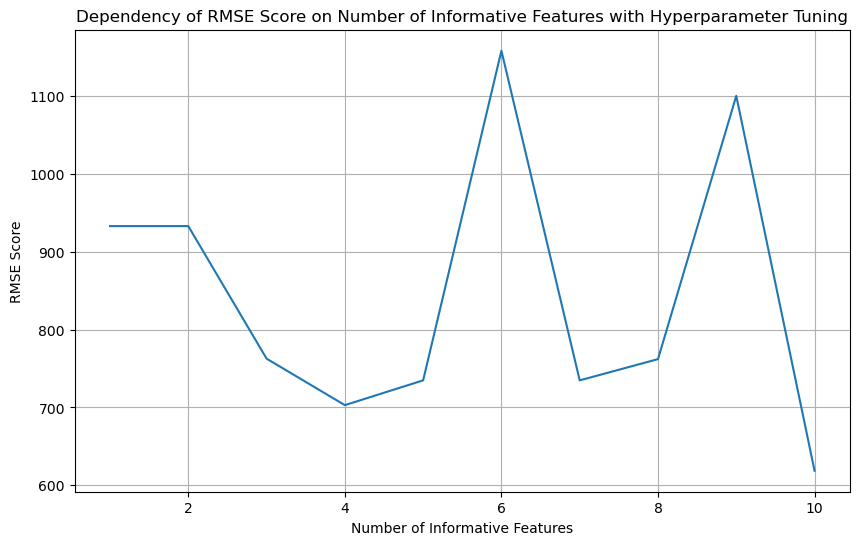

In [8]:
informative_features = np.arange(1, 11)  

param_grid = {
    "num_iter" : np.linspace(10, 50, 10).astype(int),
    "m" : np.linspace(5, 50, 15).astype(int)
}

model = BoostingElementaryPredicates(10, 5)

scorer = make_scorer(r2_score)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer)

# Now perform grid search for each number of informative features
best_params = []
for n_informative in informative_features:
    X, y = make_regression(n_samples=100, n_features=10, n_informative=n_informative, noise=0.1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    grid_search.fit(X_train, y_train)
    best_params.append(grid_search.best_params_)

# Now, use the best hyperparameters to train the BoostingElementaryPredicates model and evaluate performance
r2_scores_hyperparam = np.zeros(len(informative_features))
rmse_scores_hyperparam = np.zeros(len(informative_features))

for i, n_informative in enumerate(informative_features):
    best_param = best_params[i]
    model = BoostingElementaryPredicates(num_iter=best_param['num_iter'], m=best_param['m'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores_hyperparam[i] = r2_score(y_test, y_pred)
    rmse_scores_hyperparam[i] = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot the results with hyperparameter tuning
plt.figure(figsize=(10, 6))
plt.plot(informative_features, r2_scores_hyperparam)
plt.xlabel('Number of Informative Features')
plt.ylabel('R2 Score')
plt.title('Dependency of R2 Score on Number of Informative Features with Hyperparameter Tuning')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(informative_features, rmse_scores_hyperparam)
plt.xlabel('Number of Informative Features')
plt.ylabel('RMSE Score')
plt.title('Dependency of RMSE Score on Number of Informative Features with Hyperparameter Tuning')
plt.grid(True)
plt.show()

### Auto-MPG

In [6]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [7]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Предобработка

In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset = dataset.astype('float64')
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [11]:
y = dataset['MPG'].to_numpy()
X = dataset.drop(columns='MPG').to_numpy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("R2_score (Linear Regression):", r2_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)

R2_score (Linear Regression): 0.7901500386760351
Mean Squared Error (Linear Regression): 10.710864418838367


In [ ]:
base_value = y_hat = y_train.mean()
n = X_train.shape[1]


# for _ in range(16):
residuals = y_train - y_hat
max_residual_idx = np.argmax(np.abs(residuals))

runc = RuncDualizer()  # create new Dualizer
           
sorted_residual_indices = np.argsort(np.abs(residuals))
min_m_residual_indices = sorted_residual_indices[:60]
key_object = X_train[max_residual_idx]
comp_rows = []
for idx in min_m_residual_indices:
    comp_row = []
    for j in range(n):
        if X_train[idx, j] < key_object[j]:
            comp_row.append(j)  # Меньше
        elif X_train[idx, j] > key_object[j]:
            comp_row.append(j+n)  # Больше
    comp_rows.append(comp_row)
    if len(comp_row) > 0:
        runc.add_input_row(comp_row)

In [ ]:
for i in range(0, 20):
    print(*comp_rows[i])

10 1 2 13 4 5 16 17 18 9
0 1 12 13 4 5 16 17 18 9
0 1 2 13 4 5 16 17 8 9
0 1 2 13 4 5 16 17 8 9
0 1 2 13 4 5 6 17 8 9
0 1 2 13 14 15 6 17 18 9
0 1 2 13 4 5 6 17 8 9
0 1 2 13 14 5 16 17 8 9
0 1 2 13 4 5 6 17 8 9
0 1 2 13 4 5 6 17 8 9
0 1 2 13 4 5 6 17 18 9
0 1 2 13 4 5 16 17 8 9
0 1 2 13 4 15 16 17 8 9
0 1 2 3 4 5 16 17 8 19
0 1 12 13 4 5 16 17 8 9
0 1 2 13 4 5 16 17 18 9
0 1 2 13 14 15 6 17 8 9
0 1 12 13 4 5 16 7 8 9
0 1 2 13 4 5 6 17 18 9
0 1 2 3 4 5 16 17 8 9


In [ ]:
while True:
        covers = runc.enumerate_covers(1)
        print(covers)
                
        if len(covers) == 0:
            break

[array([16, 17], dtype=int32)]
[array([16,  8,  4, 15], dtype=int32)]
[array([16,  9, 13], dtype=int32)]
[array([16, 13, 18], dtype=int32)]
[array([16, 13, 12], dtype=int32)]
[array([16, 13, 15], dtype=int32)]
[array([16,  0], dtype=int32)]
[array([16,  5, 14, 12], dtype=int32)]
[array([16,  6], dtype=int32)]
[array([17,  8], dtype=int32)]
[array([17,  9], dtype=int32)]
[array([17, 12], dtype=int32)]
[array([17, 13], dtype=int32)]
[array([17,  0], dtype=int32)]
[array([17,  4], dtype=int32)]
[array([17,  5], dtype=int32)]
[array([17,  7], dtype=int32)]
[array([18,  8], dtype=int32)]
[array([18, 13,  2], dtype=int32)]
[array([18, 13,  5], dtype=int32)]
[array([18,  0], dtype=int32)]
[array([ 9, 19], dtype=int32)]
[array([9, 8], dtype=int32)]
[array([9, 0], dtype=int32)]
[array([9, 2], dtype=int32)]
[array([9, 3, 6], dtype=int32)]
[array([9, 4], dtype=int32)]
[array([9, 5], dtype=int32)]
[array([10,  0], dtype=int32)]
[array([13,  8, 12], dtype=int32)]
[array([13,  8, 15], dtype=int32)]


In [ ]:
model = BoostingElementaryPredicates(num_iter=16, m=60)
model.fit(X_train, y_train)

: 

: 

[7, 8, 9, 10, 4, 12, 6]
[0, 1, 9, 10, 4]
[8, 9, 10, 4, 5, 6]
[7, 8, 9, 10, 11, 5, 6]
[8, 9, 10, 4, 5]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 12, 6]
[8, 9, 10, 4, 5]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5]
[8, 9, 10, 4, 5]
[8, 9, 10, 4, 5, 6]
[7, 8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[7, 8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5]
[8, 2, 10, 11, 5, 6]
[7, 8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 11, 5, 6]
[7, 8, 9, 10, 4, 12]
[8, 9, 10, 11, 6]
[8, 9, 10, 4, 5, 6]
[8, 2, 10, 11, 5, 6]
[7, 8, 9, 10, 4, 12, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[7, 8, 9, 10, 4, 12, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[7, 8, 9, 10, 4, 5, 6]
[7, 8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5]
[7, 8, 9, 10, 4, 12]
[7, 8, 9, 10, 11, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 5, 6]
[0, 1, 9, 10, 4, 5]
[7, 8, 9, 10, 4, 5, 6]
[8, 9, 10, 4, 12, 6]
[8, 9, 10, 4, 5, 6]
[

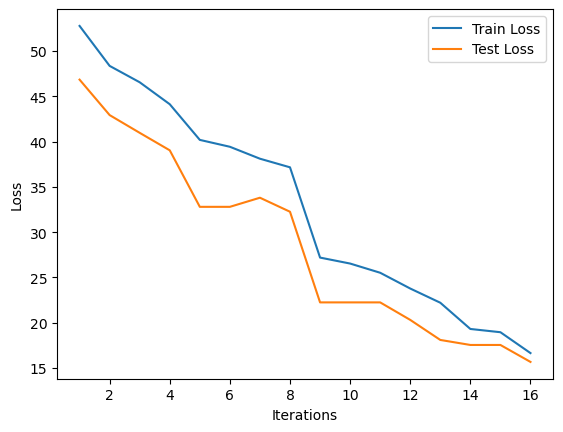

BoostingElementaryPredicates1(m=50, num_iter=16)

In [ ]:
model = BoostingElementaryPredicates1(num_iter=16, m=50)
model.fit_predict(X_train, y_train, X_test, y_test)


In [ ]:
print(mean_squared_error(y_test, model.predict(X_test)))
print(r2_score(y_test, model.predict(X_test)))

15.682347591496443
0.6927474845301591


In [10]:
data = pd.read_csv('datasets/02_yachts.csv', sep=',', header=None)
data

,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48
